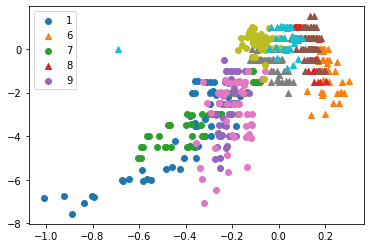

In [14]:
import glob, os
folder_clean = 'D:\\Atom\\python\\data\\cleaned\\grill\\final'

ds = [1, 6, 7, 8, 9]
for d in ds:
    df_f = pd.read_csv(os.path.join(folder_clean, 'd%d_cola_f_kde.csv' % d))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_cola_t_kde.csv' % d))
    plt.scatter(np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE']), df_f['RSSI'] - df_t['RSSI'])
    
    df_f = pd.read_csv(os.path.join(folder_clean, 'd%d_colanosugar_f_kde.csv' % d))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_colanosugar_t_kde.csv' % d))
    plt.scatter(np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE']), df_f['RSSI'] - df_t['RSSI'], marker='^')
plt.legend(ds)

In [15]:
# matls = ['water', 'vinegar', 'milk', 'oil', 'liquor', 'yogurt']
matls = ['cola', 'colanosugar']
d_p = []
d_r = []
f = []
y = []
for matl in matls:
    df_f = pd.read_csv(os.path.join(folder_clean, 'd1_%s_f_kde.csv' % (matl)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd1_%s_t_kde.csv' %(matl)))
    diff_p = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
    diff_r = df_f['RSSI'] - df_t['RSSI']
    
    d_p.extend(diff_p)
    d_r.extend(diff_r)
    f.extend(df_f['CHANNEL'].values)
    y.extend(np.repeat([matl], len(diff_p)))
    
X = np.column_stack((d_p, d_r, f))

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)
# from sklearn.tree import DecisionTreeClassifier
# tree = DecisionTreeClassifier().fit(X, y)

GaussianNB()

cola ['cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola'
 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola'
 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola'
 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola'
 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola']
Correct 1.0
-------------------------------
colanosugar ['cola' 'colanosugar' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola'
 'colanosugar' 'colanosugar' 'cola' 'cola' 'cola' 'colanosugar'
 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar' 'cola'
 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar' 'cola'
 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar' 'colanosugar'
 'cola' 'cola' 'cola' 'cola' 'colanosugar' 'cola' 'cola' 'cola' 'cola'
 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola' 'cola'
 'cola']
Correct 0.36
-------------------------------
68 100 0.68


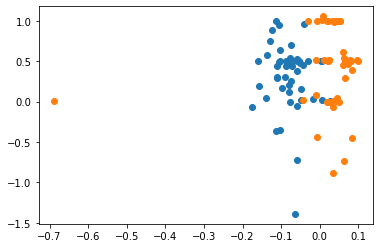

In [ ]:
cnt = 0
correctcnt = 0
for matl in matls:
    df_f = pd.read_csv(os.path.join(folder_clean, 'd9_%s_f_kde.csv' % (matl)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd9_%s_t_kde.csv' %(matl)))
    diff_p = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
    diff_r = df_f['RSSI'] - df_t['RSSI']
    plt.scatter(diff_p, diff_r)
    result = model.predict(np.column_stack((diff_p, diff_r, df_t['CHANNEL'])))

#     result = tree.predict(np.column_stack((diff_p, diff_r)))
    print(matl, result)
    correct = (result==matl).sum()
    print('Correct', correct/len(df_f))
    cnt += len(df_f)
    correctcnt += correct
    print('-------------------------------')

print(correctcnt, cnt, correctcnt/cnt)